### CS22B1082
### Thallapally Nimisha

## Assignment 5
# Sharpening an Image using the Prewitt Filter

### Input:
- **Image f**: The input image (in grayscale, e.g., Lena image).

### Output:
- **Image g**: The sharpened version of the input image `f`.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load the image

In [2]:
image_path = 'images/Lena.png' 
image_bgr = cv2.imread(image_path)  
f = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

`filter2D` function, which performs a 2D corelation operation. 

In convolution, the filter (or kernel) is flipped by 180 degrees before applying it to the image. In correlation, the filter is directly applied without flipping.

Therefore, when using `filter2D`, we implicitly flip the kernel by 180 degrees before applying it.

### Original Prewitt Filters:

- **Prewitt X Filter (for detecting horizontal edges)**:
  ```python
  Prewitt_x = np.array([[1, 0, -1],
                        [1, 0, -1],
                        [1, 0, -1]])
    ```


### Define Prewitt Filter

In [3]:
Prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

Prewitt_y = np.array([[-1, -1, -1],
                      [ 0,  0,  0],
                      [ 1,  1,  1]])

### Gradient Calculation

In [4]:
def gradient(image, kernel):
    return cv2.filter2D(image, -1, kernel)

In [5]:
# Calculate the gradients in the x and y directions
grad_x = gradient(f, Prewitt_x)
grad_y = gradient(f, Prewitt_y)

# Compute the magnitude of the gradient
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)
# Normalize and threshold the edge image
gradient_magnitude = (gradient_magnitude / gradient_magnitude.max()) * 255

### Set Threshold

In [6]:
# Threshold to detect edges
T = 200
e = np.where(gradient_magnitude > T, 1, 0)*255

### Image Sharpening

In [7]:
c = 1

# Sharpen the image
g = np.clip(f + c * e.astype(np.uint8), 0, 255)

### Displaying the results

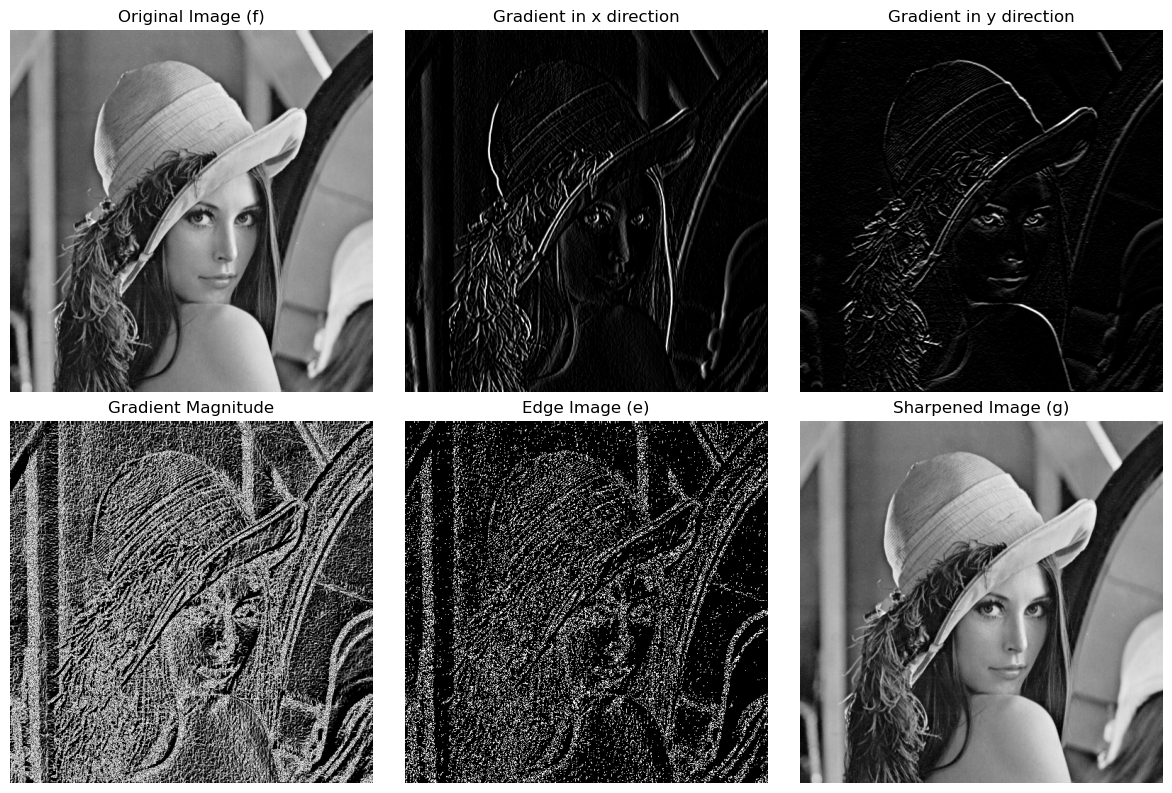

In [8]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.imshow(f, cmap='gray')
plt.title("Original Image (f)")
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(grad_x, cmap='gray')
plt.title("Gradient in x direction")
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(grad_y, cmap='gray')
plt.title("Gradient in y direction")
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(e, cmap='gray')
plt.title("Edge Image (e)")
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(g, cmap='gray')
plt.title("Sharpened Image (g)")
plt.axis('off')

plt.tight_layout()
plt.show()
